# Учебный проект 12_Определение стоимости автомобилей

## Содержание

* [Описание проекта](#описание)
* [Импорт библиотек Python](#импорт)
* [Загрузка данных](#загрузка)
* [Предобработка данных](#предобработка)
* [Исследовательский анализ данных](#исследование)
    * [Анализ категориальных данных](#исследование_категориальные)
    * [Анализ количественных данных](#исследование_количественные)
* [Корреляционный анализ данных](#корреляция)
* [Построение моделей машинного обучения](#моделирование)
    * [Подготовка данных и построение пайплайна МО](#моделирование_подготовка)
    * [Выбор оптимальной модели](#моделирование_прогноз)
    * [Анализ времени обучения, времени прогноза и качества моделей](#моделирование_анализ)
* [Общий вывод](#ОбщийВывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные с `показателями автомобилей с пробегом`, которые были предоставлены руководством компании "Не бит, не крашен".

---

`Задача`

Разработать модели машинного обучения для **прогнозирования рыночной стоимости автомобилей клиентов** при оптимизации следующих критериев:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

---

`Путь решения`

1. Собрать данные с характеристиками автомобилей клиентов;
2. Провести предобработку значений в наборах данных;
3. Провести исследовательский анализ данных для выявления закономерностей, применимых к последующей настройке моделей МО;
3. Подготовить выборки для обучения моделей;
4. Построить модели прогнозирования с учетом вводных:
    * Одна из моделей - LightGBM;
    * Минимум одна - не градиентный бустинг.
5. Провести анализ времени обучения, времени предсказания и качества моделей;
6. Сформировать вывод о подготовленных решениях. Предложить заказчику лучшую модель для прогнозирования стоимостей автомобилей.

---

`Располагаемые данные`

**Данные обучающей выборки (характеристики работников и оценка удовлетворенности работников работой в компании) - autos**

* DateCrawled - дата скачивания анкеты из базы;
* VehicleType — тип автомобильного кузова;
* RegistrationYear — год регистрации автомобиля;
* Gearbox — тип коробки передач;
* Power — мощность (л.с.);
* Model — модель автомобиля;
* Kilometer — пробег (км);
* RegistrationMonth — месяц регистрации автомобиля;
* FuelType — тип топлива;
* Brand — марка автомобиля;
* Repaired - была машина в ремонте или нет;
* DateCreated - дата создания анкеты;
* NumberOfPictures - количество фотографий автомобиля;
* PostalCode - почтовый индекс владельца анкеты (пользователя);
* LastSeen - дата последней активности пользователя;

**Целевой признак**
* Price - цена (евро).

## Импорт библиотек Python <a class = 'anchor' id = 'импорт'></a>

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения:
        * модели градиентного бустинга;
        * иные модели регрессии;
        * метрики оценки эффективности моделей;
        * механизмы отбора данных и подбора параметров моделей;
        * механизмы подготовки данных;
        * механизмы построения пайплайнов;
        * механизм заполнения пустых значений.
2. Инициализация переменных-констант для последующего использования на этапе построения моделей МО;
3. Формирование вывода по итогам данного этапа.

In [1]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# установка размеров для последующих графиков в проекте
plt.rcParams['figure.figsize'] = (10, 5)

# вычисление корреляции данных
from phik import phik_matrix

# модели градиентного бустинга
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# иные модели регрессии
from sklearn.linear_model import LinearRegression

# метрики оценки эффективности моделей
from sklearn.metrics import (mean_squared_error, 
                            root_mean_squared_error)

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)

# механизмы подготовки данных
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder)

In [2]:
# инициализация констант для дальнейшего использования в проекте
# инициализация переменной RANDOM_STATE для фиксирования "случайности"
RANDOM_STATE = 42
# инициализация переменной TEST_SIZE для разделения выборки на обучающую и тестовую
TEST_SIZE = 0.25

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для вычисления корреляции данных:
        * phik_matrix.
    * для решения задач машинного обучения:
        * модели градиентного бустинга:
            * LGBMRegressor - решение компании Microsoft;
            * CatBoostRegressor - решение компании Yandex;
            * XGBRegressor - опенсорс решение;
        * иные модели регрессии:
            * RandomForestRegressor - модель дерева принятия решений для задач регрессии;
            * LinearRegression - модель линейной регрессии;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * OrdinalEncoder - кодирование значений ранговых признаков.
2. Инициализированы переменные **RANDOM_STATE** и **TEST_SIZE** для фиксирования "случайности" и размера тестовой выборки.

## Загрузка данных <a class = 'anchor' id = 'загрузка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменной **autos**;
2. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределений количественных показателей.
3. Формирование вывода по итогам данного этапа.

In [3]:
# загрузка данных в рабочую среду

try:
    autos = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/autos.csv')
except:
    autos = pd.read_csv('/datasets/autos.csv')

In [4]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [5]:
# инициализация пользовательской функции построения распределений количественных непрерывных показателей
def num_distribution(df : pd.DataFrame, column : str, bins : int):
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения признака {column}')
    plt.ylabel(f'Частота значений признака')
    plt.title(f'Гистограмма значений {column}', fontsize = 10)
    sns.histplot(df, x = column, bins = bins)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения признака {column}')
    plt.title(f'Диаграмма размаха значений {column}', fontsize = 10)
    sns.boxplot(df, x = column)
    plt.grid(False)
    plt.show()

In [6]:
# инициализация пользовательской функции построения диаграмм количественных дискретных показателей
def num_countplot(df : pd.DataFrame, column : str):
    sns.countplot(df, x = column)
    plt.title(f'Столбчатая диаграмма значений признака {column}', fontsize = 12)
    plt.xlabel(f'Признак {column}')
    plt.ylabel(f'Количество значений признака')
    plt.show()

Структура набора данных autos


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object

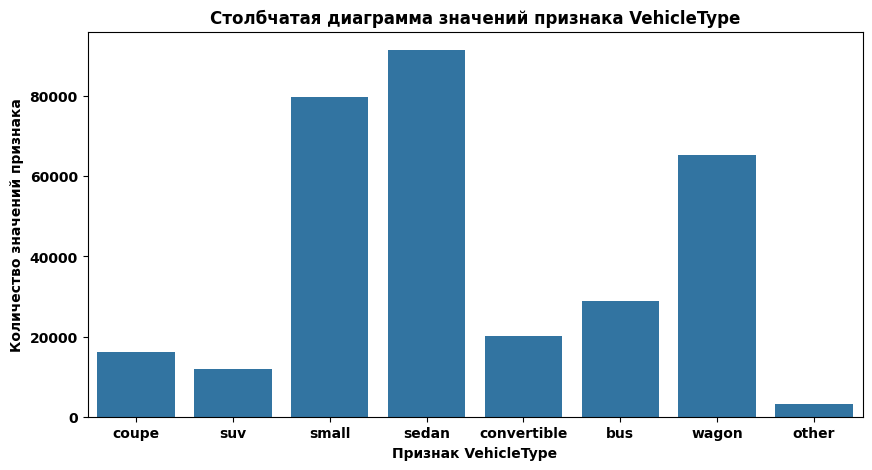

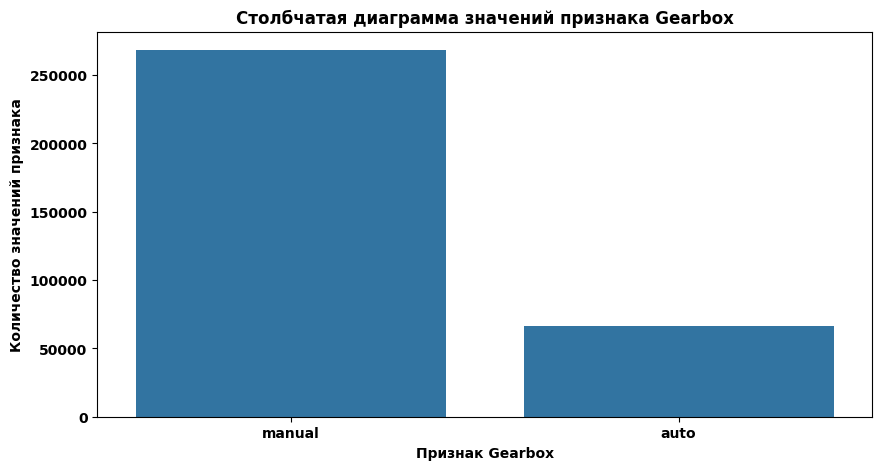

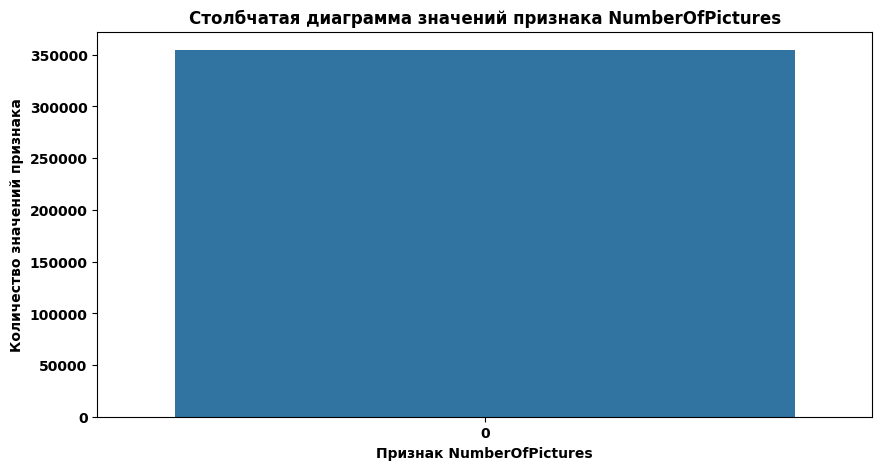

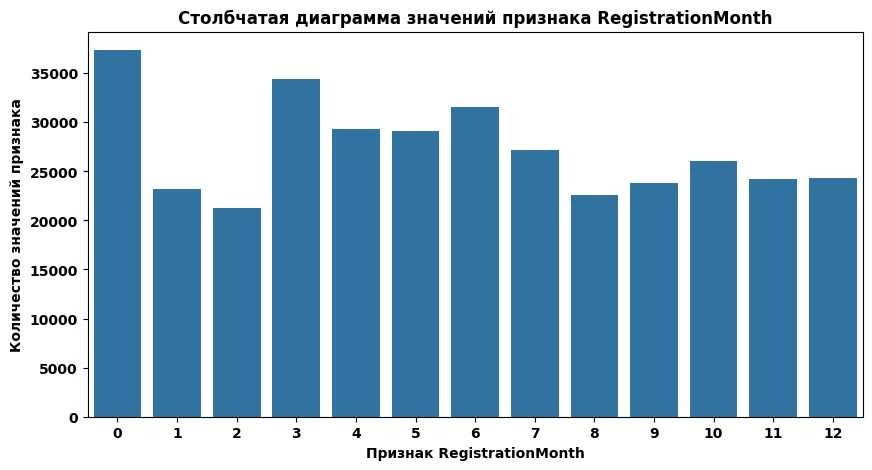

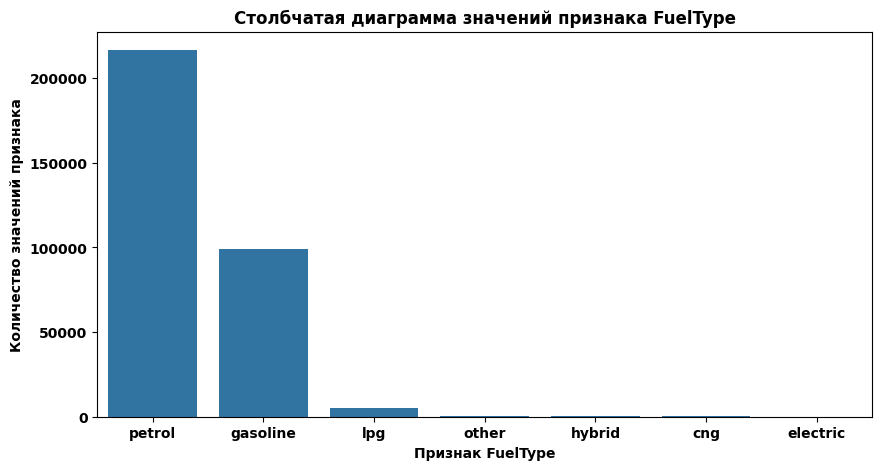

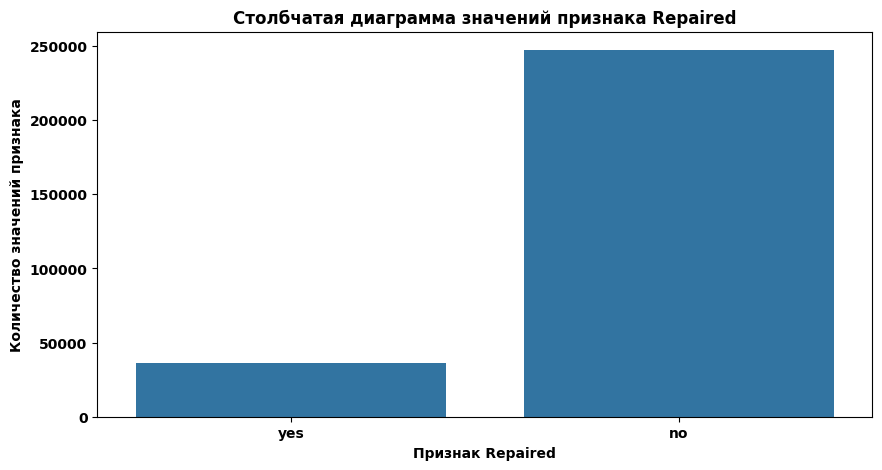

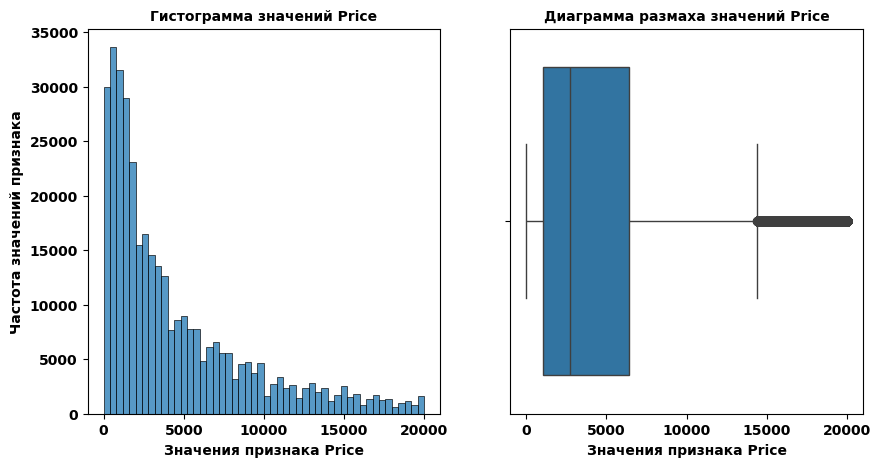

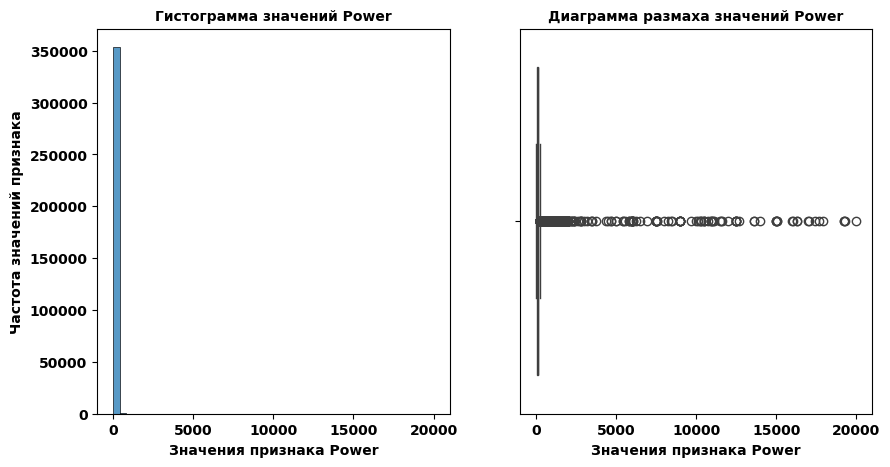

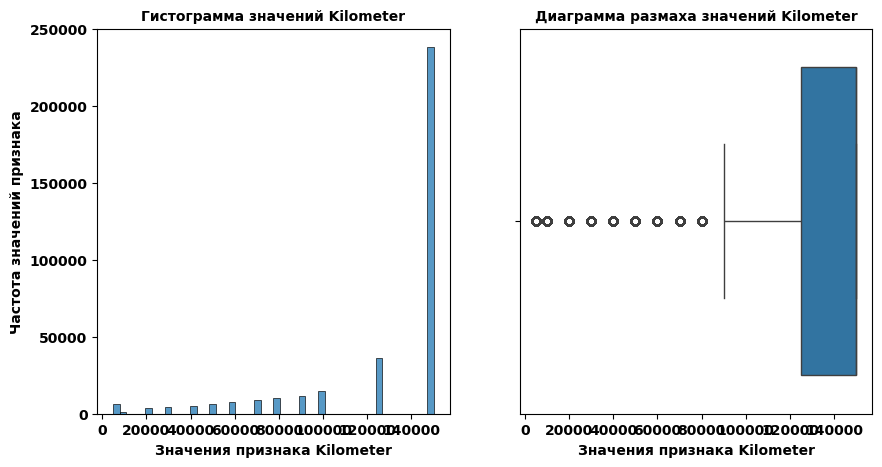

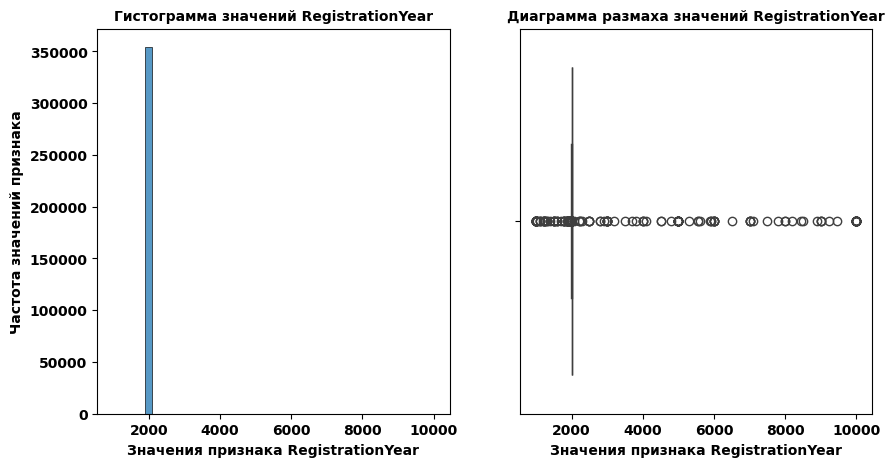

In [7]:
# вывод на экран параметров датасета 'autos'
first_meeting(autos, 'autos')

# вывод на экран графиков дискретных величин по набору 'autos'
for col in ['VehicleType', 'Gearbox', 'NumberOfPictures',
            'RegistrationMonth', 'FuelType', 'Repaired']:
    num_countplot(autos, col)

# вывод на экран графиков непрерывных количественных величин по набору 'autos'
for col in ['Price', 'Power', 'Kilometer', 'RegistrationYear']:
    num_distribution(autos, col, 50)

**Вывод**

1. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализирована переменная **autos**;
2. Выведены на экран параметры датасета:
    * В наборе данных **присутствуют пустые значения** по признакам:
        * **VehicleType**;
        * **Gearbox**;
        * **Model**;
        * **FuelType**;
        * **Repaired**.
    * Типы данных **не соответствуют сущностям значений** по следующим признакам:
        * **DateCrawled**;
        * **DateCreated**;
        * **LastSeen**.
    * Названия столбцов **необходимо привести к формату snake_case**;
    * Наблюдаются выбросы по количественным признакам:
        * **Price**;
        * **Power**;
        * **Kilometer**;
        * **RegistrationYear**
    * Самые популярные категории по типу топлива **petrol** и **gasoline**;
    * Большая часть автомобилей не были в ремонте - значение **no** по признаку **repaired**;
    * По всем объявлениям отсутствуют фотографии - значение 0 по признаку **NumberOfPictures**.

## Предобработка данных <a class = 'anchor' id = 'предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Приведение названий столбцов к формату snake_case;
2. Изучение природы пустых значений и выбор методики их устранения;
3. Замена типов данных по признакам:
    * **DateCrawled**;
    * **DateCreated**;
    * **LastSeen**.
4. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
5. Формирование вывода по итогам данного этапа.

In [8]:
# понижение регистра заголовков
autos.columns = autos.columns.str.lower()

# замена составных названий признаков
autos = autos.rename(columns = {
    'datecrawled' : 'date_crawled',
    'vehicletype' : 'vehicle_type',
    'registrationyear' : 'registration_year',
    'registrationmonth' : 'registration_month',
    'fueltype' : 'fuel_type',
    'datecreated' : 'date_created',
    'numberofpictures' : 'number_of_pictures',
    'postalcode' : 'postal_code',
    'lastseen' : 'last_seen'
})

In [9]:
# составление свода по наличию в таблице пустых значений
missing_report = autos.isna().sum().to_frame()
missing_report = missing_report.rename(columns = {0 : 'missing_count'})
missing_report['share, %'] = round(missing_report['missing_count'] * 100 / autos.shape[0], 1)
missing_report = missing_report.sort_values(by = 'share, %', ascending = False)
print('Доля пропущенных значений в наборе данных')
display(missing_report)


Доля пропущенных значений в наборе данных


,missing_count,"share, %"
repaired,71154,20.1
vehicle_type,37490,10.6
fuel_type,32895,9.3
gearbox,19833,5.6
model,19705,5.6
date_crawled,0,0.0
price,0,0.0
registration_year,0,0.0
power,0,0.0
kilometer,0,0.0


**Вывод по промежуточному этапу**

Самая большая доля пропущенных значений - по признаку **repaired**. Так как данный признак является булевым (возможны только два варианты - 'yes' или 'no'), то можно предположить, что если машина не была в ремонте, то хозяин и не стал явно указывать данный факт.

* Пропущенные значения по признаку **repaired** можно заменить на 'no';
* Пустые значения по признаку **vehicle_type** вручную заменить не получится, поэтому заполним их значением 'other';
* Пустые значения по признаку **fuel_type** можно заменить на 'petrol' (как самое часто встречающееся значение);
* Пустые значения по признаку **gearbox** можно заменить на 'manual' (как самое часто встречающееся значение);
* Пустые значения по признаку **model** можно заменить на 'other'.

In [10]:
# заполнение пустых значений с инициализацией переменной для последующего исследования набора данных - 'data'
data = autos.copy()
data['repaired'] = data['repaired'].fillna('no')
data['vehicle_type'] = data['vehicle_type'].fillna('other')
data['gearbox'] = data['gearbox'].fillna('manual')
data['model'] = data['model'].fillna('other')
data['fuel_type'] = data['fuel_type'].fillna('petrol')

In [11]:
# выделение значений даты и отброс значений времени в соответствующих столбцах
for col in ['date_crawled', 'date_created', 'last_seen']:
    data[col] = pd.to_datetime(data[col].apply(lambda x: x.split(' ')[0]), format = '%Y-%m-%d')

In [12]:
# инициализация пользовательской функции проверки уникальных значений по столбцам датасета
def unique_values(df : pd.DataFrame):
    df = df.select_dtypes(exclude = ['number', 'datetime'])
    for column in df.columns:
        print(f'Столбец {column}: {list(df[column].unique())}')

In [13]:
# проверка набора 'data' на уникальные значения
print('Уникальные значения по категориальным столбцам data')
unique_values(data)

Уникальные значения по категориальным столбцам data
Столбец vehicle_type: ['other', 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon']
Столбец gearbox: ['manual', 'auto']
Столбец model: ['golf', 'other', 'grand', 'fabia', '3er', '2_reihe', 'c_max', '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse', 'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter', 'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one', 'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo', 'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza', 'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan', '6_reihe', 'panda'

In [14]:
# проверка набора данных на явные дубликаты
print('Количество явных дубликатов по всем столбцам набора data:', data.duplicated().sum())
print('Доля задублированных значений от всего набора данных: {:.1%}'.format(data.duplicated().sum() / data.shape[0]))

Количество явных дубликатов по всем столбцам набора data: 7793
Доля задублированных значений от всего набора данных: 2.2%


In [15]:
# демонстрация задублированных значений
data[data.duplicated()].sort_values(by = ['postal_code', 'kilometer', 'price']).head(10)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
176327,2016-03-15,2200,sedan,2005,manual,101,passat,5000,0,gasoline,volkswagen,no,2016-03-15,0,1069,2016-03-15
47269,2016-04-01,1999,sedan,1996,manual,101,a4,150000,3,petrol,audi,no,2016-04-01,0,1069,2016-04-07
290053,2016-03-30,4900,wagon,2007,manual,170,passat,150000,3,gasoline,volkswagen,no,2016-03-30,0,1069,2016-03-31
349170,2016-04-03,4950,wagon,2007,manual,170,passat,150000,3,gasoline,volkswagen,no,2016-04-03,0,1069,2016-04-03
313197,2016-03-30,8000,coupe,2006,manual,163,c_klasse,60000,8,petrol,mercedes_benz,no,2016-03-30,0,1097,2016-04-07
280296,2016-03-25,999,small,1995,manual,54,twingo,150000,8,petrol,renault,no,2016-03-25,0,1097,2016-04-05
127865,2016-04-01,3200,small,2004,manual,80,fusion,100000,10,petrol,ford,no,2016-04-01,0,1099,2016-04-05
215743,2016-03-22,2650,sedan,1996,manual,170,5er,150000,10,petrol,bmw,no,2016-03-22,0,1108,2016-04-06
148880,2016-03-19,8300,sedan,2011,manual,105,leon,50000,2,petrol,seat,no,2016-03-19,0,1109,2016-03-24
185832,2016-04-04,15000,small,2014,manual,114,2_reihe,60000,8,gasoline,peugeot,no,2016-04-04,0,1109,2016-04-06


**Вывод по промежуточному этапу**

При проверке наличия явных дубликатов в наборе данных машина отобразила значение в 7 777 единиц, однако при проверке задублированных строк можно заметить, что они являются разными объявлениями - нет полностью совпадающих по значениям строк.

Вероятно, это объявления от одного и того же продавца, но с разными автомобилями или с изменными показателями (например, с ценой).

**Исключать из набора их не следует**

**Вывод**

1. Названия столбцов приведены к формату snake_case;
2. Устранены пустые значения в наборе данных:
    * **repaired** - произведена замена пустых значений на 'no';
    * **vehicle_type** - произведена замена пустых значений на 'other';
    * **fuel_type** - произведена замена пустых значений на 'petrol';
    * **gearbox** - произведена замена пустых значений на 'manual';
    * **model** - произведена замена пустых значений на 'other';
3. Произведено преобразование признаков с датой к типу datetime:
    * **date_crawled**;
    * **date_created**;
    * **last_seen**.
4. Произведена Проверка датасетов на дубликаты:
    * **Явные дубликаты в наборе данных не обнаружены**;
    * **Неявные дубликаты в наборе данных не обнаружены** - категориальные значения представлены в уникальном виде.

## Исследовательский анализ данных <a class = 'anchor' id = 'исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование соотношения количества значений качественных показателей;
3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
4. Формирование вывода по итогам этапа.

In [16]:
# вывод на экран основных статистик по набору 'data'
print(f'Основная статистическая информация по набору data')
data.select_dtypes(exclude='datetime').describe().T

Основная статистическая информация по набору data


,count,mean,std,min,25%,50%,75%,max
price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
registration_year,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
registration_month,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
number_of_pictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
postal_code,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


**Вывод по промежуточному этапу**

Набор `data` характеризуется следующими статистическими показателями:

* **price - цена автомобиля в евро**:
    * Среднее значение - 4 416.7;
    * Минимальное значение - 0.0;
    * Максимальное значение - 20 000.0;
    * Стандартное отклонение - 4 514.2.
* **registration_year - год регистрации автомобиля**:
    * Среднее значение - 2004;
    * Минимальное значение - 1000;
    * Максимальное значение - 9999. Необходимо проверить значения по данному признаку на гистограмме распределения - **на первый взгляд в наборе присутствуют аномальные значения**.
    * Стандартное отклонение - 90.
* **power - мощность (л.с.)**:
    * Среднее значение - 110.1;
    * Минимальное значение - 0.0;
    * Максимальное значение - 20 000.0;
    * Стандартное отклонение - 189.9. Необходимо проверить значения по данному признаку на гистограмме распределения - **на первый взгляд в наборе присутствуют аномальные значения**.
* **kilometer - пробег (км)**:
    * Среднее значение - 128 211.2;
    * Минимальное значение - 5 000.0;
    * Максимальное значение - 150 000.0;
    * Стандартное отклонение - 37 905.3.
* **registration_month - месяц регистрации автомобиля**:
    * Среднее значение - 5.7;
    * Минимальное значение - 0.0;
    * Максимальное значение - 12.0;
    * Стандартное отклонение - 3.7.
* **number_of_pictures - количество фотографий автомобиля**:
    * Среднее значение - 0.0;
    * Минимальное значение - 0.0;
    * Максимальное значение - 0.0;
    * Стандартное отклонение - 0.0.

Признак **number_of_pictures** не содержит полезной информации - от него можно избавиться.

In [17]:
# исключение признака 'number_of_pictures'
data = data.drop('number_of_pictures', axis = 1)

In [18]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, kind_of_plot : str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    if kind_of_plot == 'pie':
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5), autopct='%1.0f%%'))
    else:
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5)))
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlabel(xlabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_employers'] = round(pivot_data['count'] / pivot_data['count'].sum() * 100, 2)
    pivot_data.columns = ['count_of_autos', 'share_of_autos']
    display(pivot_data)

In [19]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend(bbox_to_anchor = (1, 0.6))
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

### Анализ категориальных данных <a class = 'anchor' id = 'исследование_категориальные'></a>

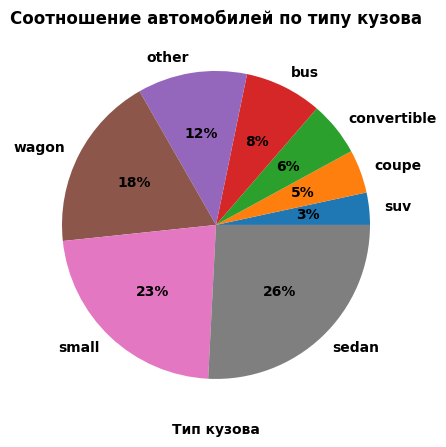

,count_of_autos,share_of_autos
vehicle_type,,
sedan,91457,25.81
small,79831,22.53
wagon,65166,18.39
other,40778,11.51
bus,28775,8.12
convertible,20203,5.70
coupe,16163,4.56
suv,11996,3.39


In [20]:
# построение пай-чарта по соотношению типов кузова автомобилей
display_info(data, 'vehicle_type', 'Соотношение автомобилей по типу кузова', 'Тип кузова', 'pie')

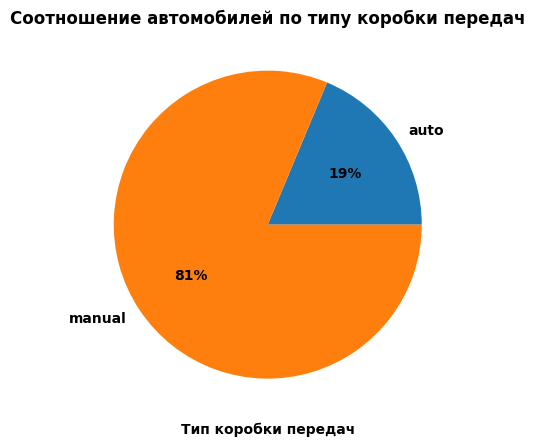

,count_of_autos,share_of_autos
gearbox,,
manual,288084,81.29
auto,66285,18.71


In [21]:
# построение пай-чарта по соотношению типов коробки передач автомобилей
display_info(data, 'gearbox', 'Соотношение автомобилей по типу коробки передач', 'Тип коробки передач', 'pie')

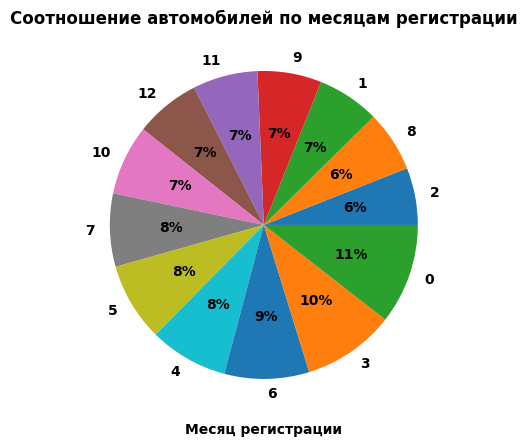

,count_of_autos,share_of_autos
registration_month,,
0,37352,10.54
3,34373,9.70
6,31508,8.89
4,29270,8.26
5,29153,8.23
7,27213,7.68
10,26099,7.36
12,24289,6.85
11,24186,6.83


In [22]:
# построение пай-чарта по соотношению месяцев регистрации автомобилей
display_info(data, 'registration_month', 'Соотношение автомобилей по месяцам регистрации', 'Месяц регистрации', 'pie')

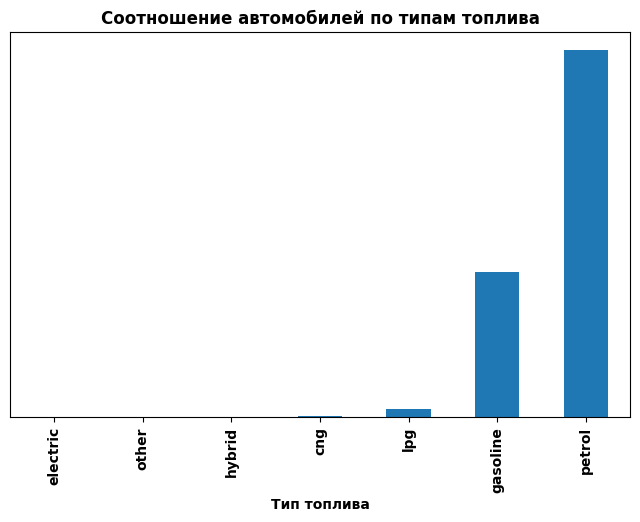

,count_of_autos,share_of_autos
fuel_type,,
petrol,249247,70.34
gasoline,98720,27.86
lpg,5310,1.50
cng,565,0.16
hybrid,233,0.07
other,204,0.06
electric,90,0.03


In [23]:
# построение пай-чарта по соотношению типов топлива автомобилей
display_info(data, 'fuel_type', 'Соотношение автомобилей по типам топлива', 'Тип топлива', 'bar')

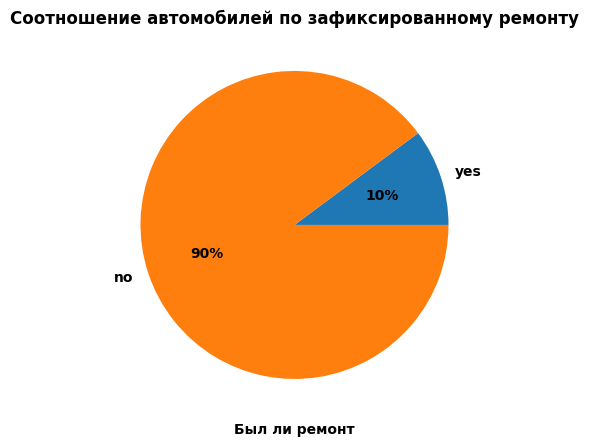

,count_of_autos,share_of_autos
repaired,,
no,318315,89.83
yes,36054,10.17


In [24]:
# построение пай-чарта по соотношению ремонта машин
display_info(data, 'repaired', 'Соотношение автомобилей по зафиксированному ремонту', 'Был ли ремонт', 'pie')

**Вывод по промежуточному этапу**

* Большая часть автомобилей (67%) представлена тремя типами кузова: **sedan** (26%), **small** (23%) и **wagon** (18%);
* Большая часть автомобилей (81%) имеет **механическую коробку передач** (manual);
* Наиболее популярные месяцы регистрации автомобилей: март (10%), июнь (9%) и апрель (8%);
* Большая часть автомобилей (70%) **использует бензин в качестве топлива**;
* **90% автомобилей не проходили ремонт** (или информация о ремонте не указана).

In [25]:
# вывод на экран среза данных, для машин с месяцем регистрации 0
data[data['registration_month'] == 0].head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen
0,2016-03-24,480,other,1993,manual,0,golf,150000,0,petrol,volkswagen,no,2016-03-24,70435,2016-04-07
9,2016-03-17,999,small,1998,manual,101,golf,150000,0,petrol,volkswagen,no,2016-03-17,27472,2016-03-31
15,2016-03-11,450,small,1910,manual,0,ka,5000,0,petrol,ford,no,2016-03-11,24148,2016-03-19
16,2016-04-01,300,other,2016,manual,60,polo,150000,0,petrol,volkswagen,no,2016-04-01,38871,2016-04-01
36,2016-03-11,1600,other,1991,manual,75,kadett,70000,0,petrol,opel,no,2016-03-11,2943,2016-04-07


**Вывод по промежуточному этапу**

Вероятно, что значение 0 в признаке **registration_month** говорит о ситуации, когда месяц либо не известен, либо была допущена техническая ошибка при записи данных об автомобиле. Для того, чтобы подобные ситуации имели тот же тип, что и остальные значения в данном признаке, то было проставлено значение 0.

### Анализ количественных данных <a class = 'anhcor' id = 'исследование_количественные'></a>

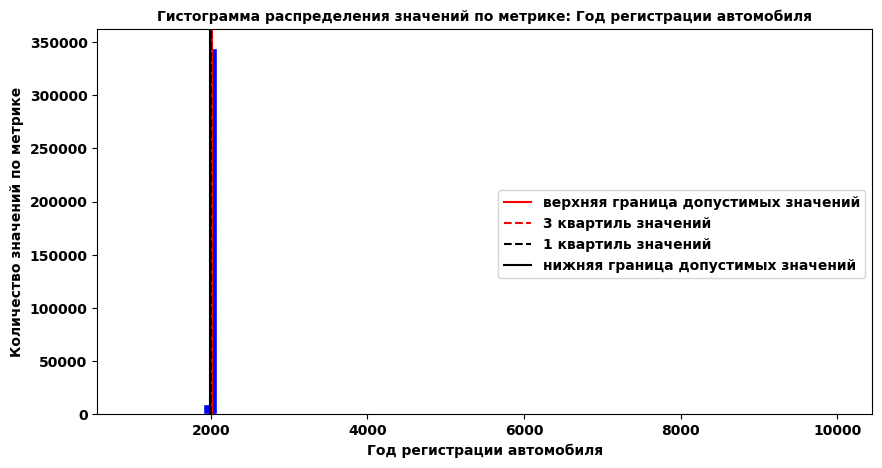

Верхняя допустимая граница значений: 2021.5
Нижняя допустимая граница значений: 1985.5
Медианное значение: 2003.0
Среднее значение: 2004.23
Доля значений, выходящих за верхнюю границу: 0.03%
Доля значений, выходящих за нижнюю границу: 1.75%


In [26]:
# построение  гистограммы распределения значений по признаку 'registration_year'
histogram_plotting(data, 'registration_year', 100, 10, 5, 'Год регистрации автомобиля')

In [27]:
# вывод на экран описательных статистик среза данных с аномально высокими значениями по признаку 'registration_year' - 
# год регистрации автомобиля не может быть больше года создания объявления
max_year = data['date_created'].dt.year.max()
data[data['registration_year'] > max_year]['registration_year'].describe()

count    14530.000000
mean      2048.944116
std        438.098060
min       2017.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       9999.000000
Name: registration_year, dtype: float64

In [28]:
# вывод на экран описательных статистик среза данных с аномально низкими значениями по признаку 'registration_year'
data[data['registration_year'] < data['registration_year'].quantile(0.25)]['registration_year'].describe()

count    79525.000000
mean      1993.047406
std         25.560615
min       1000.000000
25%       1993.000000
50%       1996.000000
75%       1997.000000
max       1998.000000
Name: registration_year, dtype: float64

**Вывод по промежуточному этапу**

По итогам анализа значений по признаку **registration_year** принято следующее решение об установки минимальной и максимальной границы значений:
* **Минимальная граница** - 1910 год. Минимально допустимая временная граница появления массовых автомобилей в мире;
* **Максимальная граница** - 2017 год. Максимально допустимая временная граница, равная дате публикации объявления на сайте.

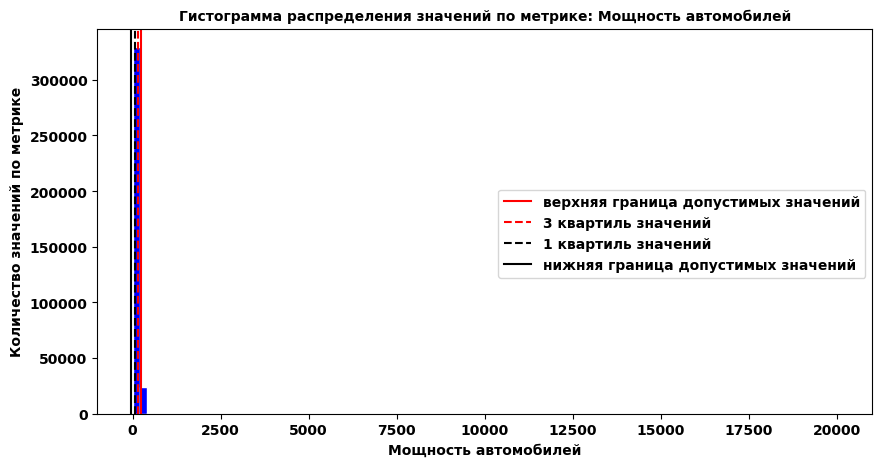

Верхняя допустимая граница значений: 254.0
Нижняя допустимая граница значений: -42.0
Медианное значение: 105.0
Среднее значение: 110.09
Доля значений, выходящих за верхнюю границу: 2.07%
Доля значений, выходящих за нижнюю границу: 0.00%


In [29]:
# построение  гистограммы распределения значений по признаку 'power'
histogram_plotting(data, 'power', 100, 10, 5, 'Мощность автомобилей')

In [30]:
# вывод на экран среза данных с аномально высокими значениями по признаку 'power'
data[data['power'] > data['power'].quantile(0.75) + 1.5 * (data['power'].quantile(0.75) - data['power'].quantile(0.25))]['power'].describe()

count     7340.000000
mean       471.903678
std       1205.819419
min        255.000000
25%        272.000000
50%        300.000000
75%        334.000000
max      20000.000000
Name: power, dtype: float64

In [31]:
# расчет доли транспортных средств с большой мощность двигателя
print('Доля транспортных средств с аномально большой мощностью двигателя: {:.1%}'.format(data[data['power'] > 1_000].shape[0] / data.shape[0]))

Доля транспортных средств с аномально большой мощностью двигателя: 0.1%


**Вывод по промежуточному этапу**

По итогам анализа значений по признаку **power** принято следующее решение об установки минимальной и максимальной границы значений:
* **Минимальная граница** - больше 0. Транспортное средство не может иметь мощность двигателя, равную 0;
* **Максимальная граница** - 1 000 л.с. Установленным значением отсекаются транспортные средства с аномально большой мощностью, доля которых составляет всего 0.1%.

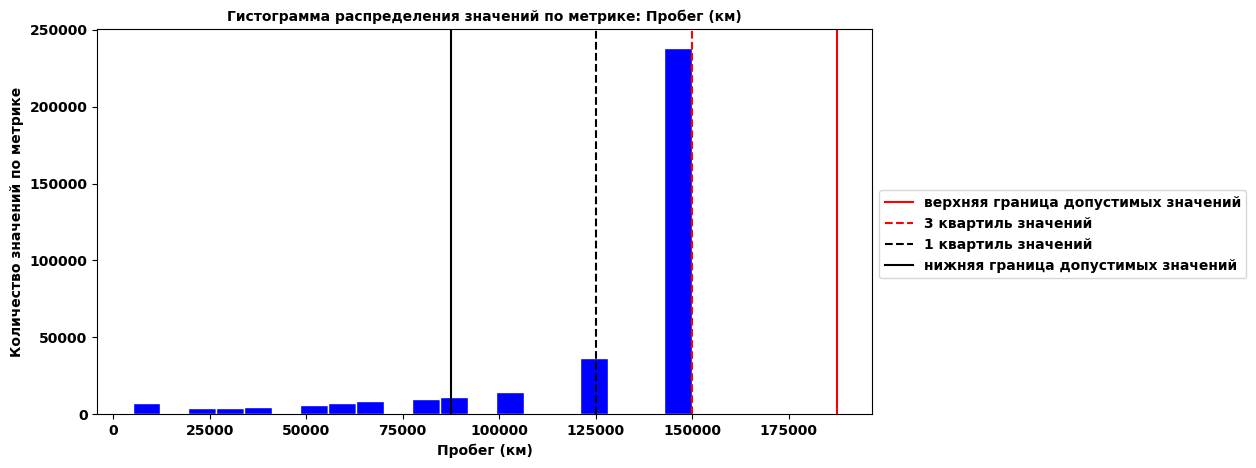

Верхняя допустимая граница значений: 187500.0
Нижняя допустимая граница значений: 87500.0
Медианное значение: 150000.0
Среднее значение: 128211.17
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 15.03%


In [32]:
# построение  гистограммы распределения значений по признаку 'kilometer'
histogram_plotting(data, 'kilometer', 20, 10, 5, 'Пробег (км)')

**Вывод по промежуточному этапу**

При детальном анализе показателя аномальных значений не найдено - транспортные средства действительно могут иметь небольшой пробег, который не равен 0.

In [33]:
# фильтрация строк по установленным границам
df = data.copy()

data = data[(data['registration_year'] >= 1910) & (data['registration_year'] <= 2017)] # фильтрация по году регистрации
data = data[(data['power'] > 0) & (data['power'] <= 1_000)] # фильтрация по мощности двигателя

print('Доля исключенных объектов от первоначального количества: {:.1%}'.format((df.shape[0] - data.shape[0]) / df.shape[0]))

Доля исключенных объектов от первоначального количества: 12.3%


**Вывод**

1. Набор `data` характеризуется следующими статистическими показателями:
    * **price - цена автомобиля в евро**:
        * Среднее значение - 4 416.7;
        * Минимальное значение - 0.0;
        * Максимальное значение - 20 000.0;
        * Стандартное отклонение - 4 514.2.
    * **registration_year - год регистрации автомобиля**:
        * Среднее значение - 2004;
        * Минимальное значение - 1000;
        * Максимальное значение - 9999;
        * Стандартное отклонение - 90.
    * **power - мощность (л.с.)**:
        * Среднее значение - 110.1;
        * Минимальное значение - 0.0;
        * Максимальное значение - 20 000.0;
        * Стандартное отклонение - 189.9.
    * **kilometer - пробег (км)**:
        * Среднее значение - 128 211.2;
            * Минимальное значение - 5 000.0;
        * Максимальное значение - 150 000.0;
        * Стандартное отклонение - 37 905.3.
    * **registration_month - месяц регистрации автомобиля**:
        * Среднее значение - 5.7;
        * Минимальное значение - 0.0;
        * Максимальное значение - 12.0;
        * Стандартное отклонение - 3.7.
    * **number_of_pictures - количество фотографий автомобиля**:
        * Среднее значение - 0.0;
        * Минимальное значение - 0.0;
        * Максимальное значение - 0.0;
        * Стандартное отклонение - 0.0.
2. Произведено исключение признака **number_of_pictures** из набора данных;
3. Произведен анализ категориальных данных:
    * Большая часть автомобилей (67%) представлена тремя типами кузова: **sedan** (26%), **small** (23%) и **wagon** (18%);
    * Большая часть автомобилей (81%) имеет **механическую коробку передач** (manual);
    * Наиболее популярные месяцы регистрации автомобилей: март (10%), июнь (9%) и апрель (8%);
    * Большая часть автомобилей (70%) **использует бензин в качестве топлива**;
    * **90% автомобилей не проходили ремонт** (или информация о ремонте не указана).
4. Проведен анализ количественных признаков:
    * По итогам анализа значений по признаку **registration_year** принято следующее решение об установки минимальной и максимальной границы значений:
        * **Минимальная граница** - 1910 год. Минимально допустимая временная граница появления массовых автомобилей в мире;
        * **Максимальная граница** - 2017 год. Максимально допустимая временная граница, равная дате публикации объявления на сайте.
    * По итогам анализа значений по признаку **power** принято следующее решение об установки минимальной и максимальной границы значений:
        * **Минимальная граница** - больше 0. Транспортное средство не может иметь мощность двигателя, равную 0;
        * **Максимальная граница** - 1 000 л.с. Установленным значением отсекаются транспортные средства с аномально большой мощностью, доля которых составляет всего 0.1%.
    * При детальном анализе показателя аномальных значений не найдено - транспортные средства действительно могут иметь небольшой пробег, который не равен 0.
5. Произведен отбор записей по условиям из п.4.

## Корреляционный анализ данных <a class = 'anchor' id = 'корреляция'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Построение матрицы корреляции - поиск признаков высокой взаимосвязи показателей объектов;
2. Проведение отбора признаков для последующего построения моделей машинного обучения;
3. Формирование вывода по итогам данного этапа.

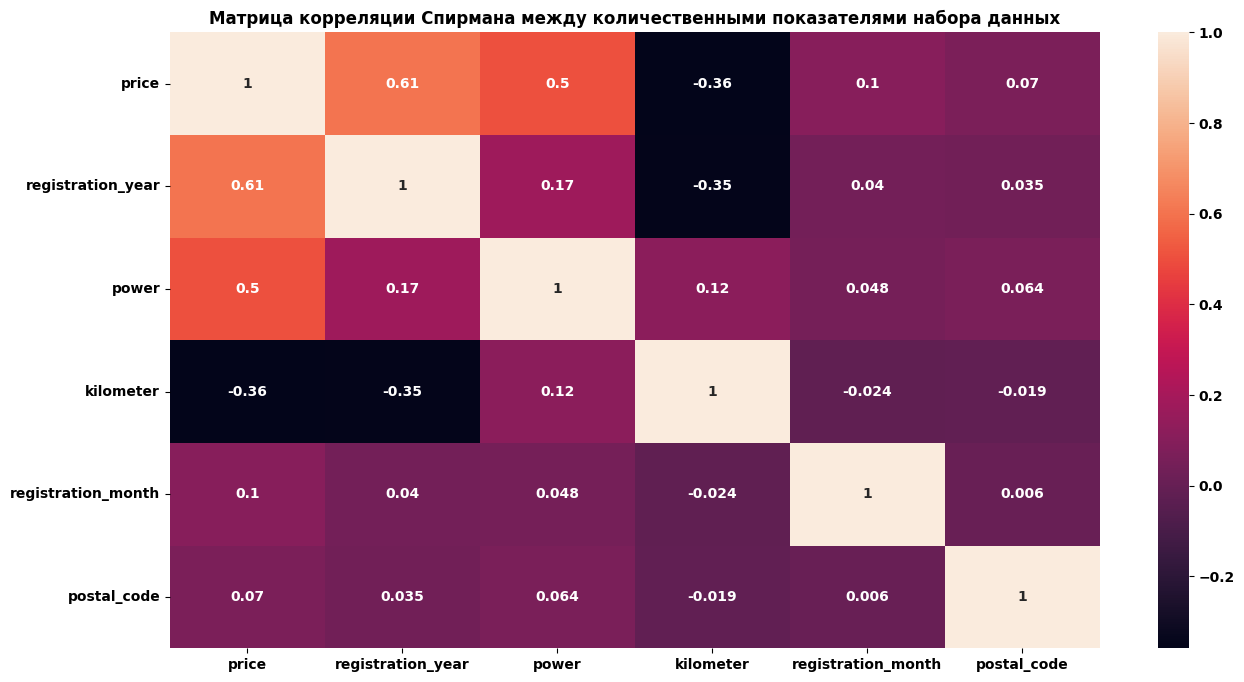

In [34]:
# построение матрицы корреляции и поиск сильных взаимосвязей
plt.figure(figsize=(15, 8))
sns.heatmap(data.select_dtypes(include = 'number').corr(method = 'spearman'), annot = True) # используется построение корреляции по Спирману, так как количественные значения не распределены нормально
plt.title('Матрица корреляции Спирмана между количественными показателями набора данных', fontsize = 12)
plt.show()

**Вывод по промежуточному этапу:**

Заметна линейная взаимосвязь (при анализе количественных показателей):
* между показателями **registration_year** и **price** (целевая переменная) - чем больше год регистрации автомобиля (от самых ранних до самых поздних годов) тем больше цена;
* между показателями **power** и **price** (целевая переменная) - чем выше мощность авто, тем больше цена;
* (обратная) между показателями **kilometer** и **price** (целевая переменная) - чем меньше пробег, тем выше цена авто;

Признаки **registration_month** и **postal_code** не имеют сильно выраженной линейной взаимосвязи с целевой переменной. Возможно, что значения признака **postal_code** стоит рассмотреть в контексте связи категориальных данных с целевой переменной.

interval columns not set, guessing: ['price', 'registration_year', 'power', 'kilometer', 'registration_month', 'postal_code']


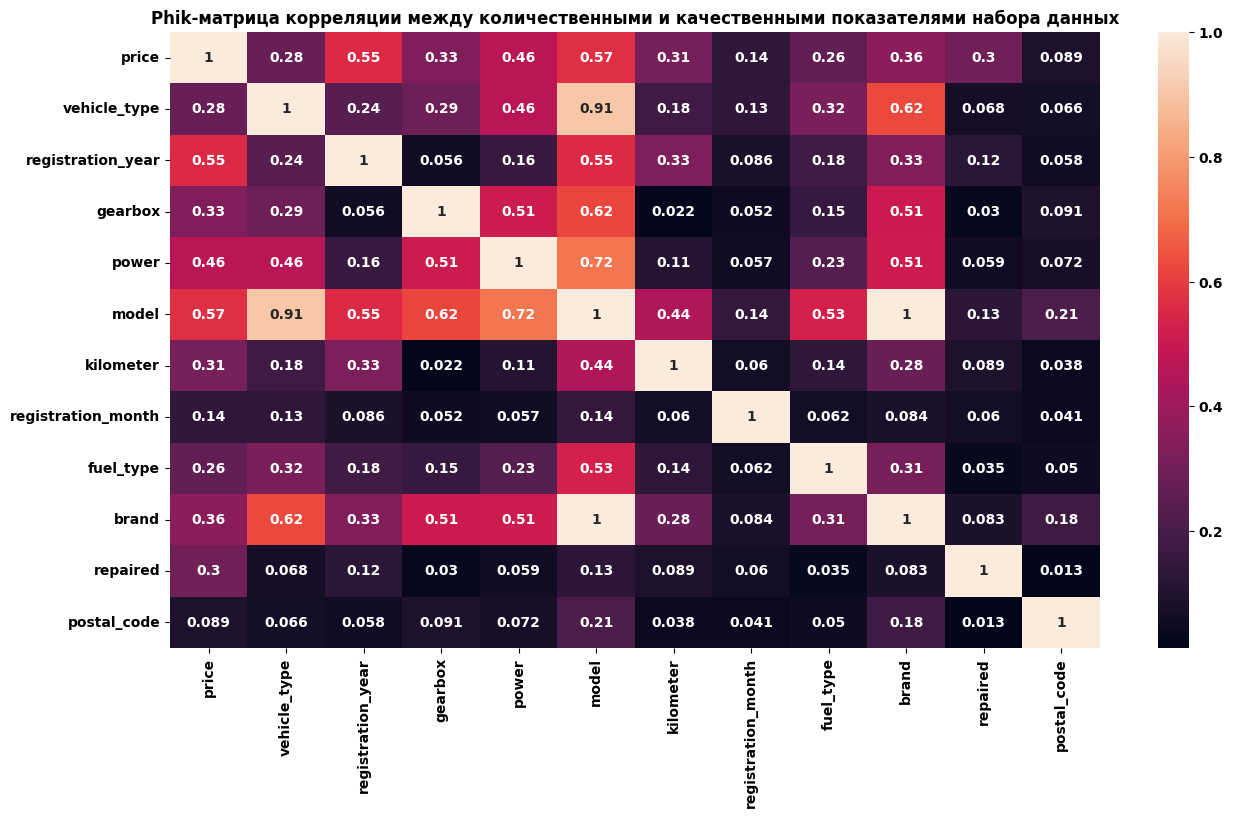

In [35]:
# построение матрицы корреляции по всем признакам с исключением дат
plt.figure(figsize=(15, 8))
sns.heatmap(data.select_dtypes(exclude = 'datetime').phik_matrix(), annot = True)
plt.title('Phik-матрица корреляции между количественными и качественными показателями набора данных', fontsize = 12)
plt.show()

**Вывод по промежуточному этапу:**

При анализе матрицы корреляции по **количественным и качественным признакам** заметна линейная взаимосвязь:
* между показателями **model** и **price** (целевая переменная) - в зависимости от модели автомобиля (например, Corvette или Camaro у Chevrolette и Niva у Lada) выше или ниже цена автомобиля;
* между показателями **gearbox** и **price** (целевая переменная) - тип коробки передач может влиять на конечную цену авто.

**Вывод**

1. Построена матрица корреляции Спирмана - произведен анализ взаимосвязей количественных признаков с целевой переменной:
    * между показателями **registration_year** и **price** (целевая переменная) - чем больше год регистрации автомобиля (от самых ранних до самых поздних годов) тем больше цена;
    * между показателями **power** и **price** (целевая переменная) - чем выше мощность авто, тем больше цена;
    * (обратная) между показателями **kilometer** и **price** (целевая переменная) - чем меньше пробег, тем выше цена авто.
2. Построена Phik-матрица корреляции - произведен анализ взаимосвязей **количественных и качественных** признаков с целевой переменной:
    * между показателями **model** и **price** (целевая переменная) - в зависимости от модели автомобиля (например, Corvette или Camaro у Chevrolette и Niva у Lada) выше или ниже цена автомобиля;
    * между показателями **gearbox** и **price** (целевая переменная) - тип коробки передач может влиять на конечную цену авто.

Для этапа построения моделей машинного обучения будут отброшены признаки, содержащие дату и время: **date_crawled**, **date_created**, **last_seen**.

Данные признаки описывают само объявление, а не автомобиль, который указывается в данном объявлении.

Также будет исключен признак **postal_code**, не имеющий взаимосвязи с целевой переменной - регион пользователя не определяет конечную стоимость автомобиля.

## Построение моделей машинного обучения <a class = 'anchor' id = 'моделирование'></a>

### Подготовка данных <a class = 'anchor' id = 'моделирование_подготовка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация пользовательской функции подготовки данных:
    * Разделение исходного набора `data` на область признаков и вектор целевой переменной - инициализация переменных `X` и **y** соответственно;
    * Инициализация переменных `X_train`, `X_test`, **y_train** и **y_test** для хранения обучающих и тестовых наборов данных;
    * Масштабирование количественных значений стратегией стандартизации;
    * Кодирование категориальных значений стратегиями OneHotEncoding и OrdinalEncoding;
    * Объединение обработанных значений в общие наборы данных - перезапись переменных `X_train` и `X_test`;
2. Отбор категориальных и количественных значений в отдельные переменные - инициализация переменных **ohe_cols**, **ord_cols** и **num_cols**;
3. Преобразование исходного набора данных;
4. Формирование вывода по итогам данного этапа.

In [36]:
# инициализация пользовательской функции расчета модели линейной регрессии
def data_preparing (df : pd.DataFrame, num_col_names : list, ohe_col_names : list, ord_col_names : list):
    
    # формирование области признаков и вектора целевой переменной
    X = df.select_dtypes(exclude = 'datetime').drop(['price', 'postal_code'], axis = 1)
    y = df['price']

    # разделение набора данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE
    )

    # инициализация переменной 'scaler'
    scaler = StandardScaler()

    # инициализация переменной 'ohe_encoder'
    ohe_encoder = OneHotEncoder(sparse_output = False,
                            drop = 'first',
                            handle_unknown = 'ignore')
    
    # инициализация переменной 'ord_encoder'
    ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

    # масштабирование количественных признаков в выборках
    X_train_sc = scaler.fit_transform(X_train[num_col_names])
    X_test_sc = scaler.transform(X_test[num_col_names])

    # кодирование категориальных признаков
    X_train_ohe = ohe_encoder.fit_transform(X_train[ohe_col_names])
    X_test_ohe = ohe_encoder.transform(X_test[ohe_col_names])

    X_train_ord = ord_encoder.fit_transform(X_train[ord_col_names])
    X_test_ord = ord_encoder.transform(X_test[ord_col_names])

    # список новых столбцов после кодирования признаков
    encoder_col_names = ohe_encoder.get_feature_names_out()

    # создание новых датафреймов после кодирования
    X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

    X_train_ord = pd.DataFrame(X_train_ord, columns = ord_col_names)
    X_test_ord = pd.DataFrame(X_test_ord, columns = ord_col_names)

    # создание новых датафреймов после масштабирования
    X_train_sc = pd.DataFrame(X_train_sc, columns = num_col_names)
    X_test_sc = pd.DataFrame(X_test_sc, columns = num_col_names)

    # объединение наборов данных
    X_train = pd.concat([X_train_ohe, X_train_ord, X_train_sc], axis = 1)
    X_test = pd.concat([X_test_ohe, X_test_ord, X_test_sc], axis = 1)

    return X_train, X_test, y_train, y_test

In [37]:
# инициализация переменных для хранения названий признаков в соответствующих категориях
ohe_cols = ['vehicle_type', 'gearbox', 'fuel_type', 'repaired']
ord_cols = ['model', 'brand']
num_cols = ['power', 'kilometer']

# преобразование наборов
X_train, X_test, y_train, y_test = data_preparing(data, num_cols, ohe_cols, ord_cols)

**Вывод**

Данный блок характеризуется следующими последовательными действиями:

1. Инициализирована пользовательской функция - **data_preparing** - подготовки данных, в которой выполняется:
    * Разделение исходного набора `data` на область признаков и вектор целевой переменной - инициализация переменных `X` и **y** соответственно;
    * Инициализация переменных `X_train`, `X_test`, **y_train** и **y_test** для хранения обучающих и тестовых наборов данных;
    * Масштабирование количественных значений стратегией стандартизации;
    * Кодирование категориальных значений стратегиями OneHotEncoding и OrdinalEncoding;
    * Объединение обработанных значений в общие наборы данных - перезапись переменных `X_train` и `X_test`;
2. Произведен лтбор категориальных и количественных значений в отдельные переменные - инициализированы переменные **ohe_cols**, **ord_cols** и **num_cols**;
3. Выполнено преобразование исходного набора данных.

### Выбор оптимальной модели <a class = 'anchor' id = 'моделирование_прогноз'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация пользовательских функций по построению визуализаций по остаткам моделей и важности признаков;
2. Инициализация, обучение и построение прогноза с помощью моделей МО из набора:
    * LinearRegression;
    * LGBMRegressor;
    * CatBoostRegressor.
3. Оценка качества моделей на тестовом наборе данных;
4. Построение графиков анализа признаков и остатков моделей;
5. Анализ времени, затраченного на обучение модели и построение прогноза;
6. Формирование вывода по итогам данного этапа.

In [38]:
# инициализация пользовательской функции по анализу остатков
def residuals_analysis(y_test, predictions):
    # инициализация переменной 'residuals' - расчет остатков
    residuals = y_test - predictions

    # построение визуализации для анализа остатков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

In [39]:
# инициализация пользовательской функции построения визуализации важности признаков для механизма модели МО
def features_analysis(X_train : pd.DataFrame, model_features, model_name : str):
    # формирование свода по значениям важности признаков
    importances_data = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': model_features
        })
    importances_data = importances_data.sort_values(by = 'Importance', ascending = False)
    # построение столбчатой диаграммы для визуализации важности признаков
    plt.bar(x = importances_data['Attribute'],
            height = importances_data['Importance'],
            color='#087E8B')
    plt.title(f'Важность признаков в модели {model_name}', fontsize = 12)
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Степень важности')
    plt.xlabel('Список признаков')
    plt.show()

#### Линейная регрессия <a class = 'anchor' id = 'моделирование_прогноз_линрег'></a>

In [40]:
# инициализация объекта линейной регрессии и первое обучение модели
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

lr_pred = reg_lr.predict(X_test)

print('Ошибка RMSE на тестовом наборе данных: {:.2f}'.format(root_mean_squared_error(y_test, lr_pred)))

Ошибка RMSE на тестовом наборе данных: 3183.34


In [41]:
%%time

# инициализация объекта "перебора параметров модели по сетке" - GridSearchCV - для поиска лучших параметров модели линейной регрессии
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(reg_lr,
                    parameters,
                    cv = 5,
                    scoring = 'neg_root_mean_squared_error',
                    verbose = False)
grid.fit(X_train, y_train)
grid.best_params_

CPU times: total: 12.2 s
Wall time: 2.4 s


{'copy_X': True, 'fit_intercept': True}

In [42]:
%%time

# использование лучших настроек для повторного обучения модели линейной регрессии
lr_tuned = LinearRegression(**grid.best_params_).fit(X_train, y_train)

CPU times: total: 1.47 s
Wall time: 172 ms


In [43]:
%%time

# вывод на экран значений метрики RMSE для обновленной модели линейной регрессии
lr_pred = lr_tuned.predict(X_test)
print('Ошибка RMSE на тестовом наборе данных улучшенной линейной регрессии: {:.2f}'.format(root_mean_squared_error(y_test, lr_pred)))

Ошибка RMSE на тестовом наборе данных улучшенной линейной регрессии: 3183.34
CPU times: total: 0 ns
Wall time: 12 ms


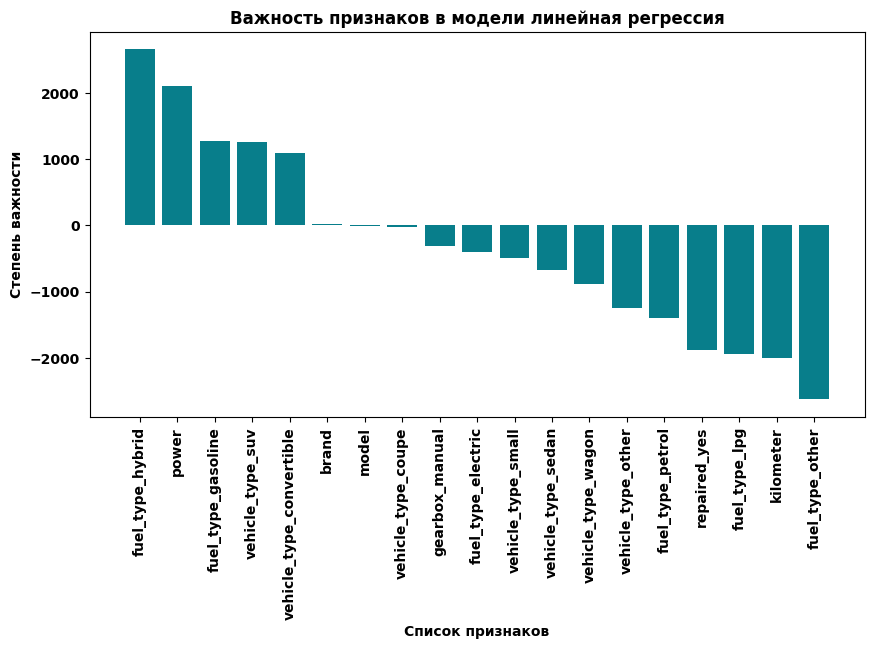

In [44]:
# визуализация важности признаков в механизме модели
features_analysis(X_train, lr_tuned.coef_, 'линейная регрессия')

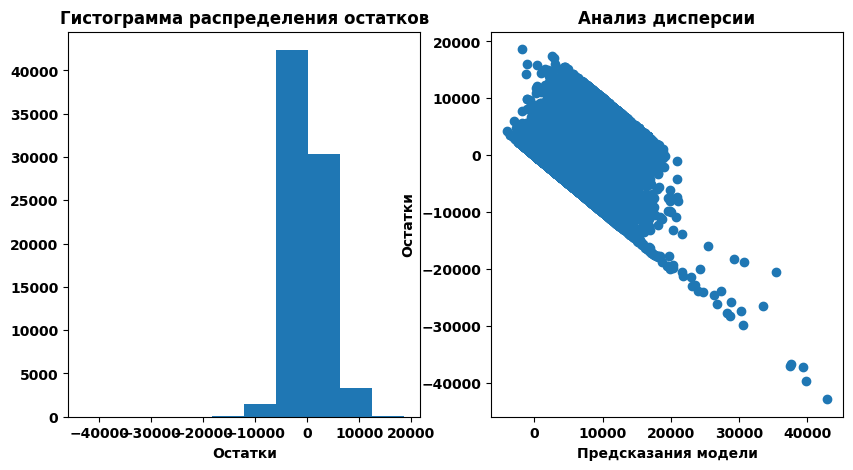

In [45]:
# построение графиков по остаткам прогнозирования модели линейной регрессии
residuals_analysis(y_test, lr_pred)

**Вывод по промежуточному этапу**

* Топ-5 важных признаков для механизма модели:
    1. fuel_type_other (Тип топлива - прочие);
    2. kilometer (Пробег);
    3. fuel_type_lpg (Тип топлива - прочие);
    4. fuel_type_hybrid (Тип топлива - гибрид);
    5. power (Мощность, л.с.).
* Произведен анализ остатков:
    * **Модель ошибается в среднем на 3 183.3 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
    * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.

#### LightGBM <a class = 'anchor' id = 'моделирование_прогноз_lightgbm'></a>

In [46]:
%%time

# инициализация и обучение объекта модели LightGBM
reg_lgbm = LGBMRegressor(random_state = RANDOM_STATE).fit(X_train, y_train)
lgbm_pred = reg_lgbm.predict(X_test)

print('Ошибка RMSE на тестовом наборе данных модели LightGBM: {:.2f}'.format(root_mean_squared_error(y_test, lgbm_pred)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 233107, number of used features: 19
[LightGBM] [Info] Start training from score 4707.126058
Ошибка RMSE на тестовом наборе данных модели LightGBM: 2460.30
CPU times: total: 4.61 s
Wall time: 514 ms


In [47]:
%%time

# инициализация параметров для последующего перебора и поиска лучшей конфигурации модели LightGBM
lgbm_params = {
    'n_estimators' : [1_000, 1_500],
    'max_depth' : [10, 15]
}

# инициализация объекта "перебора параметров модели по сетке" - GridSearchCV - для поиска лучших параметров модели линейной регрессии
grid_withParams = GridSearchCV(reg_lgbm,
                             lgbm_params,
                             cv = 5,
                             scoring = 'neg_root_mean_squared_error',
                             n_jobs = -1,
                             verbose=False).fit(X_train, y_train)

grid_withParams.best_params_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 233107, number of used features: 19
[LightGBM] [Info] Start training from score 4707.126058
CPU times: total: 39.5 s
Wall time: 1min 25s


{'max_depth': 15, 'n_estimators': 1500}

In [48]:
%%time

lgbm_tuned = LGBMRegressor(**grid_withParams.best_params_).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 233107, number of used features: 19
[LightGBM] [Info] Start training from score 4707.126058
CPU times: total: 35.7 s
Wall time: 2.62 s


In [49]:
%%time
lgbm_pred = lgbm_tuned.predict(X_test)

print('Ошибка RMSE на тестовом наборе данных улучшенной линейной регрессии: {:.2f}'.format(root_mean_squared_error(y_test, lgbm_pred)))

Ошибка RMSE на тестовом наборе данных улучшенной линейной регрессии: 2133.40
CPU times: total: 10.7 s
Wall time: 770 ms


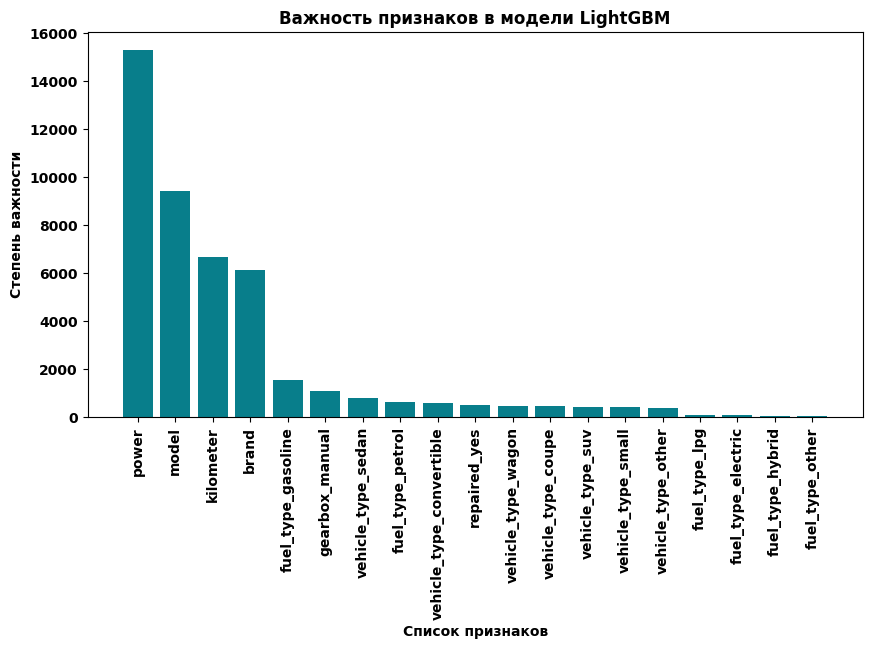

In [50]:
# визуализация важности признаков в механизме модели
features_analysis(X_train, lgbm_tuned.feature_importances_, 'LightGBM')

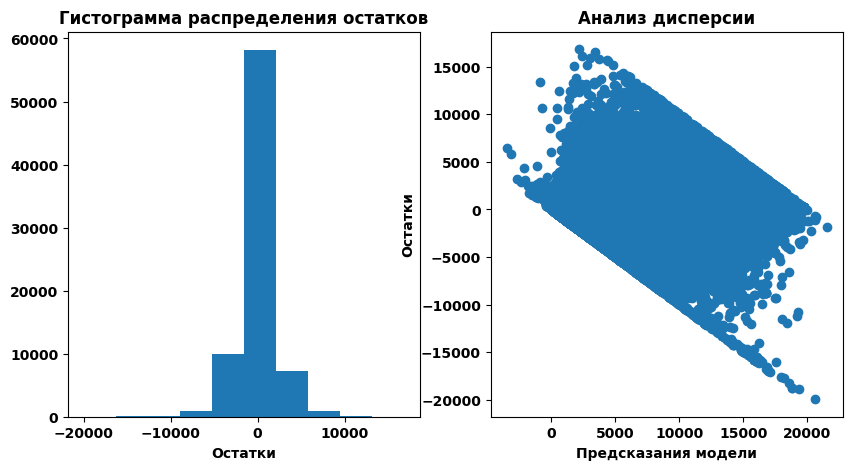

In [51]:
# построение графиков по остаткам прогнозирования модели LightGBM
residuals_analysis(y_test, lgbm_pred)

**Вывод по промежуточному этапу**

* Лучшие параметры модели **LGBMRegressor** на предложенном наборе значений:
    * 'max_depth' = 15;
    * 'n_estimators' = 1 500.
* Топ-5 важных признаков для механизма модели:
    1. power (Мощность л.с.);
    2. model (Модель автомобиля);
    3. kilometer (Пробег);
    4. brand (Марка автомобиля);
    5. fuel_type_gasoline (Тип топлива - бензин).
* Произведен анализ остатков:
    * **Модель ошибается в среднем на 2 133.4 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
    * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.

#### CatBoost <a class = 'anchor' id = 'моделирование_прогноз_catboost'></a>

In [52]:
%%time

reg_cbr = CatBoostRegressor(
    random_state = RANDOM_STATE,
    logging_level='Silent').fit(X_train, y_train)

CPU times: total: 2min 22s
Wall time: 11.2 s


In [53]:
%%time

cbr_pred = reg_cbr.predict(X_test)
print('Ошибка RMSE на тестовом наборе данных модели CatBoost: {:.2f}'.format(root_mean_squared_error(y_test, cbr_pred)))

Ошибка RMSE на тестовом наборе данных модели CatBoost: 2302.19
CPU times: total: 125 ms
Wall time: 23 ms


In [54]:
%%time

cbr_params = {
    'iterations' : [1_000],
    'learning_rate' : [0.05, 0.1],
    'depth' : [8, 10],
    'l2_leaf_reg' : [1, 3]
}

reg_cbr = CatBoostRegressor(
    random_state = RANDOM_STATE,
    loss_function = 'RMSE',
    eval_metric = 'RMSE',
    logging_level = 'Silent')

# инициализация объекта "перебора параметров модели по сетке" - GridSearchCV - для поиска лучших параметров модели линейной регрессии
grid_withParams = GridSearchCV(reg_cbr,
                             cbr_params,
                             cv = 5,
                             scoring = 'neg_root_mean_squared_error',
                             n_jobs = -1,
                             verbose=False).fit(X_train, y_train)

CPU times: total: 2min 55s
Wall time: 13min 8s


In [55]:
grid_withParams.best_params_

{'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [56]:
%%time

cbr_tuned = (CatBoostRegressor(**grid_withParams.best_params_, logging_level = 'Silent')
            .fit(X_train, y_train))

CPU times: total: 2min 54s
Wall time: 23.7 s


In [57]:
%%time
cbr_pred = cbr_tuned.predict(X_test)
print('Ошибка RMSE на тестовом наборе данных улучшенной модели CatBoost: {:.2f}'.format(root_mean_squared_error(y_test, cbr_pred)))

Ошибка RMSE на тестовом наборе данных улучшенной модели CatBoost: 2147.47
CPU times: total: 1.27 s
Wall time: 129 ms


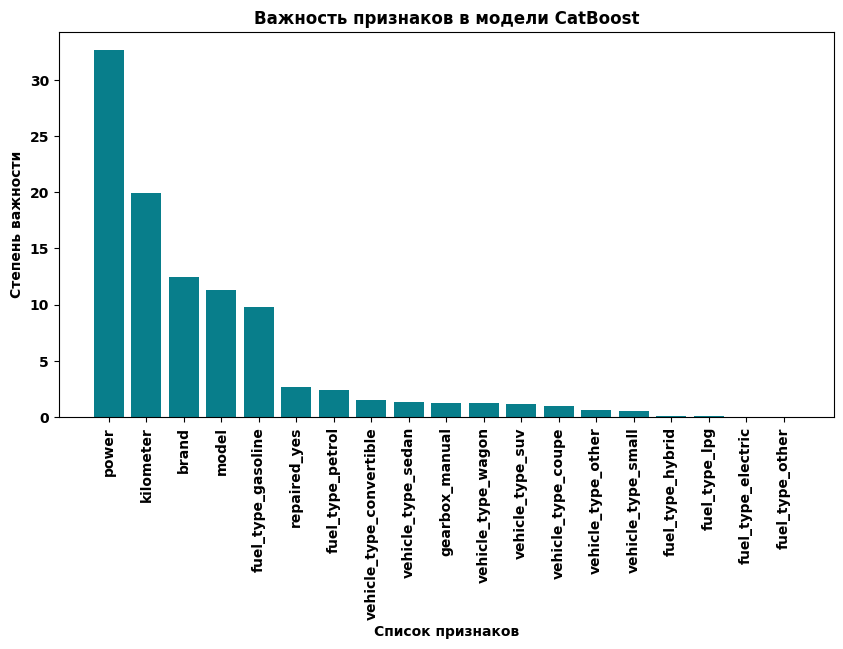

In [58]:
# визуализация важности признаков в механизме модели
features_analysis(X_train, cbr_tuned.feature_importances_, 'CatBoost')

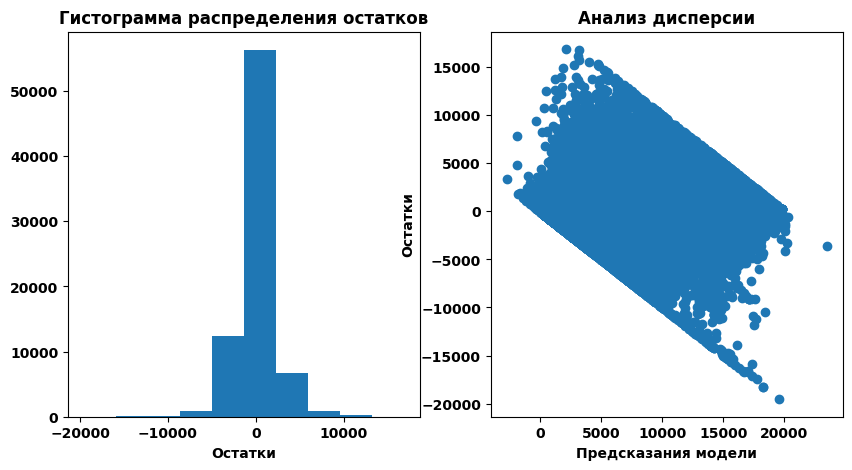

In [59]:
# построение графиков по остаткам прогнозирования модели CatBoost
residuals_analysis(y_test, cbr_pred)

**Вывод по промежуточному этапу**

* Лучшие параметры модели **CatBoostRegressor** на предложенном наборе значений:
    * 'depth' = 10;
    * 'iterations' = 1000;
    * 'l2_leaf_reg' = 1;
    * 'learning_rate': 0.1.
* Топ-5 важных признаков для механизма модели:
    1. power (Мощность л.с.);
    2. kilometer (Пробег);
    3. brand (Марка автомобиля);
    4. model (Модель автомобиля);
    5. fuel_type_gasoline (Тип топлива - бензин).
* Произведен анализ остатков:
    * **Модель ошибается в среднем на 2 147.47 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
    * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.


**Вывод**

1. Инициализированы пользовательские функции по построению визуализаций по остаткам моделей и важности признаков;
2. Произведены инициализация, обучение и построение прогноза с помощью моделей МО из набора:
    * LinearRegression;
    * LGBMRegressor;
    * CatBoostRegressor.
3. Произведена оценка качества моделей на тестовом наборе данных. Оценка RMSE составляет:
    * LinearRegression - 3 183.3;
    * LGBMRegressor - 2 133.4;
    * CatBoostRegressor - 2 147.5
4. Построены графики анализа остатков моделей:
    * LinearRegression:
        * **Модель ошибается в среднем на 3 183.3 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
        * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.
    * LGBMRegressor:
        * **Модель ошибается в среднем на 2 133.4 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
        * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.
    * CatBoostRegressor:
        * **Модель ошибается в среднем на 2 147.47 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
        * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.
5. Построены графики анализа признаков моделей:
    * LinearRegression:
        1. fuel_type_other (Тип топлива - прочие);
        2. kilometer (Пробег);
        3. fuel_type_lpg (Тип топлива - прочие);
        4. fuel_type_hybrid (Тип топлива - гибрид);
        5. power (Мощность, л.с.).
    * LGBMRegressor:
        1. power (Мощность л.с.);
        2. model (Модель автомобиля);
        3. kilometer (Пробег);
        4. brand (Марка автомобиля);
        5. fuel_type_gasoline (Тип топлива - бензин).
    * CatBoostRegressor:
        1. power (Мощность л.с.);
        2. kilometer (Пробег);
        3. brand (Марка автомобиля);
        4. model (Модель автомобиля);
        5. fuel_type_gasoline (Тип топлива - бензин).
6. Произведен анализ времени, затраченного на обучение модели и построение прогноза, а также метрики качества моделей - RMSE.
    * LinearRegression:
        * Время обучения - 172 мс;
        * Время прогнозирования - 12 мс;
        * Значение RMSE - 3 183.3.
    * LGBMRegressor:
        * Время обучения - 2.6 сек;
        * Время прогнозирования - 770 мс;
        * Значение RMSE - 2 133.4.
    * CatBoostRegressor:
        * Время обучения - 23.7 сек;
        * Время прогнозирования - 129 мс;
        * Значение RMSE - 2 147.5.

## Общий вывод <a class = 'anchor' id = 'вывод'></a>

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для вычисления корреляции данных:
        * phik_matrix.
    * для решения задач машинного обучения:
        * модели градиентного бустинга:
            * LGBMRegressor - решение компании Microsoft;
            * CatBoostRegressor - решение компании Yandex;
            * XGBRegressor - опенсорс решение;
        * иные модели регрессии:
            * RandomForestRegressor - модель дерева принятия решений для задач регрессии;
            * LinearRegression - модель линейной регрессии;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * OrdinalEncoder - кодирование значений ранговых признаков.
2. Инициализированы переменные **RANDOM_STATE** и **TEST_SIZE** для фиксирования "случайности" и размера тестовой выборки.
3. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализирована переменная **autos**;
4. Выведены на экран параметры датасета:
    * В наборе данных **присутствуют пустые значения** по признакам:
        * **VehicleType**;
        * **Gearbox**;
        * **Model**;
        * **FuelType**;
        * **Repaired**.
    * Типы данных **не соответствуют сущностям значений** по следующим признакам:
        * **DateCrawled**;
        * **DateCreated**;
        * **LastSeen**.
    * Названия столбцов **необходимо привести к формату snake_case**;
    * Наблюдаются выбросы по количественным признакам:
        * **Price**;
        * **Power**;
        * **Kilometer**;
        * **RegistrationYear**
    * Самые популярные категории по типу топлива **petrol** и **gasoline**;
    * Большая часть автомобилей не были в ремонте - значение **no** по признаку **repaired**;
    * По всем объявлениям отсутствуют фотографии - значение 0 по признаку **NumberOfPictures**.
5. Названия столбцов приведены к формату snake_case;
6. Устранены пустые значения в наборе данных:
    * **repaired** - произведена замена пустых значений на 'no';
    * **vehicle_type** - произведена замена пустых значений на 'other';
    * **fuel_type** - произведена замена пустых значений на 'petrol';
    * **gearbox** - произведена замена пустых значений на 'manual';
    * **model** - произведена замена пустых значений на 'other';
7. Произведено преобразование признаков с датой к типу datetime:
    * **date_crawled**;
    * **date_created**;
    * **last_seen**.
8. Произведена Проверка датасетов на дубликаты:
    * **Явные дубликаты в наборе данных не обнаружены**;
    * **Неявные дубликаты в наборе данных не обнаружены** - категориальные значения представлены в уникальном виде.
9. Набор `data` характеризуется следующими статистическими показателями:
    * **price - цена автомобиля в евро**:
        * Среднее значение - 4 416.7;
        * Минимальное значение - 0.0;
        * Максимальное значение - 20 000.0;
        * Стандартное отклонение - 4 514.2.
    * **registration_year - год регистрации автомобиля**:
        * Среднее значение - 2004;
        * Минимальное значение - 1000;
        * Максимальное значение - 9999;
        * Стандартное отклонение - 90.
    * **power - мощность (л.с.)**:
        * Среднее значение - 110.1;
        * Минимальное значение - 0.0;
        * Максимальное значение - 20 000.0;
        * Стандартное отклонение - 189.9.
    * **kilometer - пробег (км)**:
        * Среднее значение - 128 211.2;
            * Минимальное значение - 5 000.0;
        * Максимальное значение - 150 000.0;
        * Стандартное отклонение - 37 905.3.
    * **registration_month - месяц регистрации автомобиля**:
        * Среднее значение - 5.7;
        * Минимальное значение - 0.0;
        * Максимальное значение - 12.0;
        * Стандартное отклонение - 3.7.
    * **number_of_pictures - количество фотографий автомобиля**:
        * Среднее значение - 0.0;
        * Минимальное значение - 0.0;
        * Максимальное значение - 0.0;
        * Стандартное отклонение - 0.0.
10. Произведено исключение признака **number_of_pictures** из набора данных;
11. Произведен анализ категориальных данных:
    * Большая часть автомобилей (67%) представлена тремя типами кузова: **sedan** (26%), **small** (23%) и **wagon** (18%);
    * Большая часть автомобилей (81%) имеет **механическую коробку передач** (manual);
    * Наиболее популярные месяцы регистрации автомобилей: март (10%), июнь (9%) и апрель (8%);
    * Большая часть автомобилей (70%) **использует бензин в качестве топлива**;
    * **90% автомобилей не проходили ремонт** (или информация о ремонте не указана).
12. Проведен анализ количественных признаков:
    * По итогам анализа значений по признаку **registration_year** принято следующее решение об установки минимальной и максимальной границы значений:
        * **Минимальная граница** - 1910 год. Минимально допустимая временная граница появления массовых автомобилей в мире;
        * **Максимальная граница** - 2017 год. Максимально допустимая временная граница, равная дате публикации объявления на сайте.
    * По итогам анализа значений по признаку **power** принято следующее решение об установки минимальной и максимальной границы значений:
        * **Минимальная граница** - больше 0. Транспортное средство не может иметь мощность двигателя, равную 0;
        * **Максимальная граница** - 1 000 л.с. Установленным значением отсекаются транспортные средства с аномально большой мощностью, доля которых составляет всего 0.1%.
    * При детальном анализе показателя аномальных значений не найдено - транспортные средства действительно могут иметь небольшой пробег, который не равен 0.
13. Произведен отбор записей по условиям из п.12;
14. Построена матрица корреляции Спирмана - произведен анализ взаимосвязей количественных признаков с целевой переменной:
    * между показателями **registration_year** и **price** (целевая переменная) - чем больше год регистрации автомобиля (от самых ранних до самых поздних годов) тем больше цена;
    * между показателями **power** и **price** (целевая переменная) - чем выше мощность авто, тем больше цена;
    * (обратная) между показателями **kilometer** и **price** (целевая переменная) - чем меньше пробег, тем выше цена авто.
15. Построена Phik-матрица корреляции - произведен анализ взаимосвязей **количественных и качественных** признаков с целевой переменной:
    * между показателями **model** и **price** (целевая переменная) - в зависимости от модели автомобиля (например, Corvette или Camaro у Chevrolette и Niva у Lada) выше или ниже цена автомобиля;
    * между показателями **gearbox** и **price** (целевая переменная) - тип коробки передач может влиять на конечную цену авто.
16. Из набора данных исключены признаки, содержащие дату и время: **date_crawled**, **date_created**, **last_seen**. Также исключен признак **postal_code**;
17. Инициализированы пользовательские функции по построению визуализаций по остаткам моделей и важности признаков;
18. Произведены инициализация, обучение и построение прогноза с помощью моделей МО из набора:
    * LinearRegression;
    * LGBMRegressor;
    * CatBoostRegressor.
19. Произведена оценка качества моделей на тестовом наборе данных. Оценка RMSE составляет:
    * LinearRegression - 3 183.3;
    * LGBMRegressor - 2 133.4;
    * CatBoostRegressor - 2 147.5
20. Построены графики анализа остатков моделей:
    * LinearRegression:
        * **Модель ошибается в среднем на 3 183.3 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
        * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.
    * LGBMRegressor:
        * **Модель ошибается в среднем на 2 133.4 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
        * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.
    * CatBoostRegressor:
        * **Модель ошибается в среднем на 2 147.47 евро в БОЛЬШУЮ сторону**, т.е. предсказывает цену БОЛЬШЕ, чем реальные значения;
        * **Дисперсия остатков не имеет характерной формы, чтобы судить о работе модели** - форма имеет вид параллелограмма на большей части отрезка данных.
21. Построены графики анализа признаков моделей:
    * LinearRegression:
        1. fuel_type_other (Тип топлива - прочие);
        2. kilometer (Пробег);
        3. fuel_type_lpg (Тип топлива - прочие);
        4. fuel_type_hybrid (Тип топлива - гибрид);
        5. power (Мощность, л.с.).
    * LGBMRegressor:
        1. power (Мощность л.с.);
        2. model (Модель автомобиля);
        3. kilometer (Пробег);
        4. brand (Марка автомобиля);
        5. fuel_type_gasoline (Тип топлива - бензин).
    * CatBoostRegressor:
        1. power (Мощность л.с.);
        2. kilometer (Пробег);
        3. brand (Марка автомобиля);
        4. model (Модель автомобиля);
        5. fuel_type_gasoline (Тип топлива - бензин).
22. Произведен анализ времени, затраченного на обучение модели и построение прогноза, а также метрики качества моделей - RMSE.
    * LinearRegression:
        * Время обучения - 172 мс;
        * Время прогнозирования - 12 мс;
        * Значение RMSE - 3 183.3.
    * LGBMRegressor:
        * Время обучения - 2.6 сек;
        * Время прогнозирования - 770 мс;
        * Значение RMSE - 2 133.4.
    * CatBoostRegressor:
        * Время обучения - 23.7 сек;
        * Время прогнозирования - 129 мс;
        * Значение RMSE - 2 147.5.

**Таким образом, по совокупности выводной информации, лучшей моделью прогнозирования является LGBMRegressor**.